In [1]:
# !python -m pip install --upgrade pip
!python -m pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

# Import statements

In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load data

AutoGluon's `TabularDataset` is a subclass of pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), so any `DataFrame` methods can be used on `TabularDataset` as well.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# define paths
train_path='/content/drive/MyDrive/lufthansa/train_data.csv'

test_path= '/content/drive/MyDrive/lufthansa/test_data.csv'

# load
train_data= pd.read_csv(train_path)

test_data=pd.read_csv(test_path)


# remove the number of likes, comments and amount of followers
train_data= train_data.drop(["post_id", "engagement_difference", "cat_features_idx","num_likes", "num_comments","num_followers","text_tokenized_no_stops",'is_event_numeric',
       'contains_link_numeric', 'High_vividness', 'Low_vividness',
       'Medium_vividness', 'Evening', 'Afternoon', 'Night', 'Morning',
       'landscape', 'square', 'portrait', 'Spring', 'Summer', 'Fall'], axis=1)
print(f"The train_data set has {len(train_data)} rows")

test_data=test_data.drop(["post_id", "engagement_difference", "cat_features_idx","num_likes", "num_comments","num_followers", "text_tokenized_no_stops",'is_event_numeric',
       'contains_link_numeric', 'High_vividness', 'Low_vividness',
       'Medium_vividness', 'Evening', 'Afternoon', 'Night', 'Morning',
       'landscape', 'square', 'portrait', 'Spring', 'Summer', 'Fall'], axis=1)
print(f"The test_data set has {len(test_data)} rows")


The train_data set has 984 rows
The test_data set has 247 rows


In [5]:
# convert to tabular format
train_data_tabular_regression = TabularDataset(train_data)
train_data_tabular_regression.head()
# we are interested in predicting the engagement
label = 'engagement'
train_data_tabular_regression[label].describe()

count    984.000000
mean       0.226430
std        0.123791
min        0.046087
25%        0.142618
50%        0.196621
75%        0.277250
max        1.160491
Name: engagement, dtype: float64

## Training Regression

We now construct a `TabularPredictor` by specifying the label column name and then train on the dataset with `TabularPredictor.fit()`. We don't need to specify any other parameters. AutoGluon will recognize this is a regression task, perform automatic feature engineering, train multiple models, and then ensemble the models to create the final predictor.

In [6]:
predictor_regression = TabularPredictor(label=label).fit(train_data_tabular_regression,presets='best_quality', time_limit=1200)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_193206"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231219_193206/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20231219_193206/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

# Shap

In [8]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.9 MB/s eta 0:00:00


In [9]:
import shap

In [10]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names, target_class=None):
        self.ag_model = predictor
        self.feature_names = feature_names
        self.target_class = target_class
        if target_class is None and predictor.problem_type != 'regression':
            print("Since target_class not specified, SHAP will explain predictions for each class")

    def predict_proba(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        preds = self.ag_model.predict(X)

        return preds


In [25]:
# Define the baseline reference value by randomly sampling 50% of the observations
baseline = train_data_tabular_regression.sample(frac=0.3, random_state=42)

# Display the first few rows of the baseline_sampled DataFrame
display(baseline.head())


,text,num_words,num_hashtags,num_tags,num_exclamation_marks,num_question_marks,is_event,sentiment,subjectivity,contains_link,...,vividness,contains_city,aspect_ratio_category,colorfulness,face_count,photo_has_text,has_airplane,has_brand_logo,engagement,post_date
613,Did you know the Alexanderplatz neighborhood in Berlin was once a cattle market? 🐄\r\n#LHCityOfTheMonth\r\n\r\nPhoto by: @augenbl.icke\r\n,8.0,1.0,1.0,0.0,0.0,False,0.0000,0.000000,False,...,Low,1.0,portrait,22.360001,1.0,0.0,0.0,0,0.167195,2018-05-18
451,"If you need us, we'll be taking it easy in this lakeside cabin in Königssee for the remainder of winter. \r\nPhoto by: @kaihornung\r\n",12.0,0.0,1.0,0.0,0.0,False,0.4404,0.833333,False,...,Low,0.0,portrait,38.580002,0.0,0.0,0.0,0,0.310440,2017-11-30
731,#PlaneSpotting is our favorite way to pass the time. What's your airport ritual?\r\n\r\nPhoto by: @thestylespread\r\n,9.0,1.0,1.0,0.0,0.0,False,0.4588,1.000000,False,...,Low,0.0,square,13.290000,0.0,0.0,1.0,1,0.352668,2018-09-26
436,"Taking the phrase ""pastel skies"" to an entirely new level. \r\nPhoto by: @kosmetikelz\r\n",9.0,0.0,1.0,0.0,0.0,False,0.0000,0.454545,False,...,Low,0.0,square,21.790001,0.0,0.0,1.0,0,0.272130,2017-11-15
275,Find your quiet place. Photo by: @tw2nty.two\r\n,5.0,0.0,1.0,0.0,0.0,False,0.0000,0.333333,False,...,Low,0.0,portrait,60.529999,2.0,1.0,0.0,0,0.173792,2017-06-18


In [26]:
# # define the baseline reference value for SHAP
# baseline = train_data_tabular_regression
# display(baseline.head())


In [27]:

 # create a KernelExplainer which will return Kernel SHAP values to explain particular AutoGluon predictions
ag_wrapper = AutogluonWrapper(predictor_regression, train_data_tabular_regression.columns, label)
explainer = shap.KernelExplainer(ag_wrapper.predict_proba, baseline)
print("Baseline prediction: ", np.mean(ag_wrapper.predict_proba(baseline)))  # this is the same as explainer.expected_value

NSHAP_SAMPLES = 100  # how many samples to use to approximate each Shapely value, larger values will be slower

Baseline prediction:  0.22605076


In [14]:
#  #explain a prediction for a single datapoint from the training data.

# ROW_INDEX = 0  # index of an example datapoint
# single_datapoint = train_data_tabular_regression.iloc[[ROW_INDEX]]
# single_prediction = ag_wrapper.predict_proba(single_datapoint)

# shap_values_single = explainer.shap_values(single_datapoint, nsamples=NSHAP_SAMPLES)
# shap.force_plot(explainer.expected_value, shap_values_single, train_data_tabular_regression.iloc[ROW_INDEX,:],matplotlib=True)

In [30]:
# plot Kernel SHAP explanations aggregated across many predictions, say over 100 datapoints in the test data.
import random
# Get the number of rows in your dataset
total_rows = len(test_data)

# Select 100 random indices
random_indices = random.sample(range(total_rows), 100)


# Extract the corresponding rows from the dataset
random_rows_df = test_data.iloc[random_indices]

test_data_tab_regression = TabularDataset(random_rows_df)

In [31]:
shap_values = explainer.shap_values(test_data_tab_regression, nsamples=40)
shap.force_plot(explainer.expected_value, shap_values, test_data_tab_regression)  # if you do not have add argument

  0%|          | 0/100 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=5.039e-04, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=4.565e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 19 iterations, alpha=4.565e-04, previous alpha=4.563e-04, with an active set of 12 regressors.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.150e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 ite

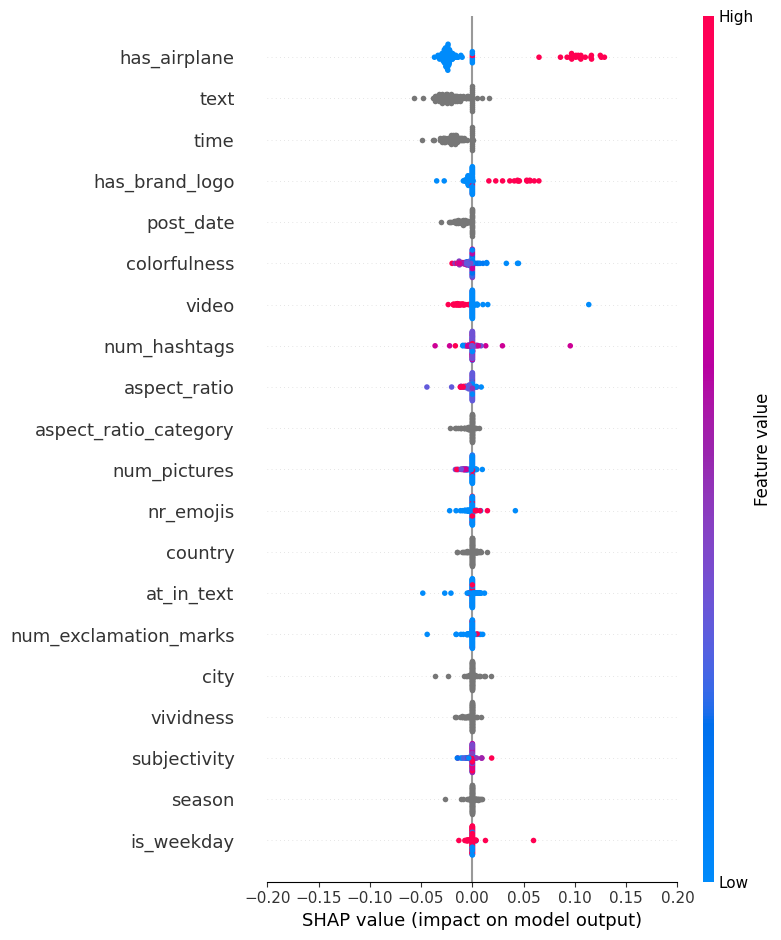

In [48]:
# Calculate shap_values
shap.summary_plot(shap_values, test_data_tab_regression, show=False)
ax = plt.gca()

# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.2, 0.2)
plt.show()

## Feature importance

In [49]:
# feature importance
feature_importance= predictor_regression.feature_importance(data=train_data_tabular_regression)
feature_importance["variable"]= feature_importance.index

These features in provided data are not utilized by the predictor and will be ignored: ['num_question_marks', 'ad', 'city_bool', 'country_bool']
Computing feature importance via permutation shuffling for 33 features using 984 rows with 5 shuffle sets...
	1139.98s	= Expected runtime (228.0s per shuffle set)
	375.61s	= Actual runtime (Completed 5 of 5 shuffle sets)


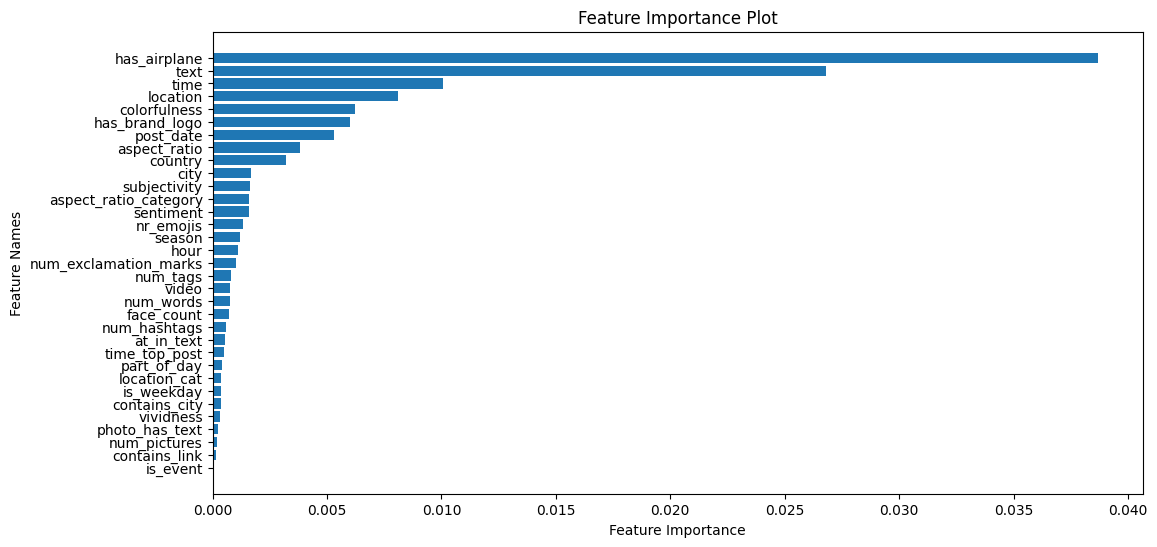

In [50]:
import matplotlib.pyplot as plt

#Extract feature names and importances
feature_names = feature_importance['variable']
importances = feature_importance['importance']

# Create a bar plot for feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

## Prediction and Saving predictions of regression

Once we have a predictor that is fit on the training dataset, we can load a separate set of data to use for prediction and evaulation.

In [51]:
test_data_tab_regression = TabularDataset(test_data)

test_data_tab_regression["predictions_engagement"] = predictor_regression.predict(test_data_tab_regression.drop(columns=[label]))
test_data_tab_regression.head()

,text,num_words,num_hashtags,num_tags,num_exclamation_marks,num_question_marks,is_event,sentiment,subjectivity,contains_link,...,contains_city,aspect_ratio_category,colorfulness,face_count,photo_has_text,has_airplane,has_brand_logo,engagement,post_date,predictions_engagement
0,Locked and loaded. Where do you think we're headed? #Lufthansa #WeekendTrip\r\n,6.0,2.0,0.0,0.0,0.0,False,0.0000,0.00,False,...,0.0,landscape,15.300000,0.0,1.0,1.0,1,0.407746,2019-06-14,0.407956
1,Locked and loaded. Where do you think we're headed? #Lufthansa #WeekendTrip\r\n,6.0,2.0,0.0,0.0,0.0,False,0.0000,0.00,False,...,0.0,square,38.389999,1.0,0.0,0.0,0,0.135971,2019-06-15,0.154154
2,#HappyFathersDay to all the dads out there. We're happy to fly you and your little ones.\r\n,6.0,1.0,0.0,0.0,0.0,False,0.5719,0.80,False,...,0.0,landscape,32.310001,4.0,0.0,0.0,0,0.140144,2019-06-16,0.142105
3,Get a taste of traditional Macedonian architecture when you visit the mountain village of Palaios Panteleimonas. #CityOfTheMonth\r\n,11.0,1.0,0.0,0.0,0.0,False,0.0000,0.75,False,...,0.0,square,34.529999,0.0,0.0,0.0,0,0.113373,2019-06-17,0.127471
4,This Vlatadon Monastery was built in the 14th century and is one of the 15 UNESCO World Heritage Sites in Thessaloniki. #UNESCO #CityOfTheMonth\r\n,14.0,2.0,0.0,0.0,0.0,False,0.0000,0.00,False,...,0.0,landscape,33.830002,1.0,1.0,0.0,0,0.092214,2019-06-18,0.121051


In [52]:
# calculate RMSE and MSE
# Extract the true values and predicted values from the DataFrame
true_values = test_data_tab_regression['engagement']
predicted_values = test_data_tab_regression['predictions_engagement']

# Calculate MSE
mse = mean_squared_error(true_values, predicted_values)
# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.025575217840023166
RMSE: 0.159922536998458


In [53]:
# write to csv
test_data_tab_regression.to_csv('/content/drive/MyDrive/lufthansa/predictions_regression.csv', index=False)


## Evaluation_regression

We can evaluate the predictor on the test dataset using the `evaluate()` function, which measures how well our predictor performs on data that was not used for fitting the models.

In [54]:
predictor_regression.evaluate(test_data_tab_regression, silent=False)
# rather strange that these metrics are negative

Evaluation: root_mean_squared_error on test data: -0.159922536998458
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.159922536998458,
    "mean_squared_error": -0.025575217840023166,
    "mean_absolute_error": -0.09788331916298795,
    "r2": 0.44053067379657196,
    "pearsonr": 0.7387578063375683,
    "median_absolute_error": -0.058834976003176574
}


{'root_mean_squared_error': -0.159922536998458,
 'mean_squared_error': -0.025575217840023166,
 'mean_absolute_error': -0.09788331916298795,
 'r2': 0.44053067379657196,
 'pearsonr': 0.7387578063375683,
 'median_absolute_error': -0.058834976003176574}

AutoGluon's `TabularPredictor` also provides the `leaderboard()` function, which allows us to evaluate the performance of each individual trained model on the test data.

In [55]:
predictor_regression.leaderboard(test_data_tab_regression,extra_info=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,ExtraTreesMSE_BAG_L1,-0.152472,-0.088662,root_mean_squared_error,0.115915,0.328709,5.563894,0.115915,0.328709,5.563894,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[photo_has_text, text.symbol_count.#, __nlp__.can, __nlp__.on, __nlp__.city_name munich, num_exclamation_marks, city, text.symbol_ratio.-, __nlp__.true, __nlp__.city_name region_name, __nlp__.do, text.symbol_count.?, location.word_count, __nlp__.de exact_city_match false, __nlp__.photo, __nlp__.re, __nlp__.take, __nlp__.as, text.symbol_ratio.@, post_date.dayofweek, __nlp__.on the, __nlp__.happy, text.special_ratio, season, time.year, video, location.symbol_count. , __nlp__.away, __nlp__.km, __nlp__.zip_code city_name berlin, __nlp__.all, __nlp__.berlin germany, __nlp__.false exact_region_m...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}",[],"[RandomForestMSE_BAG_L2, NeuralNetFastAI_BAG_L2, WeightedEnsemble_L3, ExtraTreesMSE_BAG_L2, CatBoost_BAG_L2, NeuralNetTorch_BAG_L2, LightGBMXT_BAG_L2, LightGBM_BAG_L2, XGBoost_BAG_L2]"
1,NeuralNetTorch_BAG_L2,-0.153345,-0.084602,root_mean_squared_error,2.428820,4.984417,603.358074,0.308602,1.267864,52.339886,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[photo_has_text, text.symbol_count.#, num_exclamation_marks, RandomForestMSE_BAG_L1, city, text.symbol_ratio.-, text.symbol_count.?, location.word_count, text.symbol_ratio.@, post_date.dayofweek, text.special_ratio, NeuralNetTorch_BAG_L1, XGBoost_BAG_L1, season, time.year, video, location.symbol_count. , text.char_count, text.symbol_ratio.?, KNeighborsDist_BAG_L1, text.symbol_count./, time.month, text.symbol_ratio.!, is_event, sentiment, text.symbol_count.@, post_date.month, text.symbol_ratio.:, nr_emojis, subjectivity, has_airplane, num_tags, CatBoost_r177_BAG_L1, country, CatBoost_BAG_L1...",None,"{'num_epochs': 500, 'epochs_wo_improve': 20, 'activation': 'relu', 'embedding_size_factor': 1.0, 'embed_exponent': 0.56, 'max_embedding_dim': 100, 'y_range': None, 'y_range_extend': 0.05, 'dropout_prob': 0.1, 'optimizer': 'adam', 'learning_rate': 0.0003, 'weight_decay': 1e-06, 'proc.embed_min_categories': 4, 'proc.impute_strategy': 'median', 'proc.max_category_levels': 100, 'proc.skew_threshold': 0.99, 'use_ngram_features': False, 'num_layers': 4, 'hidden_size': 128, 'max_batch_size': 512, 'use_batchno